In [1]:
import neo4j
import osmnx as ox
import geopy.distance

In [2]:
G = ox.graph_from_place("Lisboa", network_type="drive", simplify=True)

In [3]:
print(G)

MultiDiGraph with 10094 nodes and 20632 edges


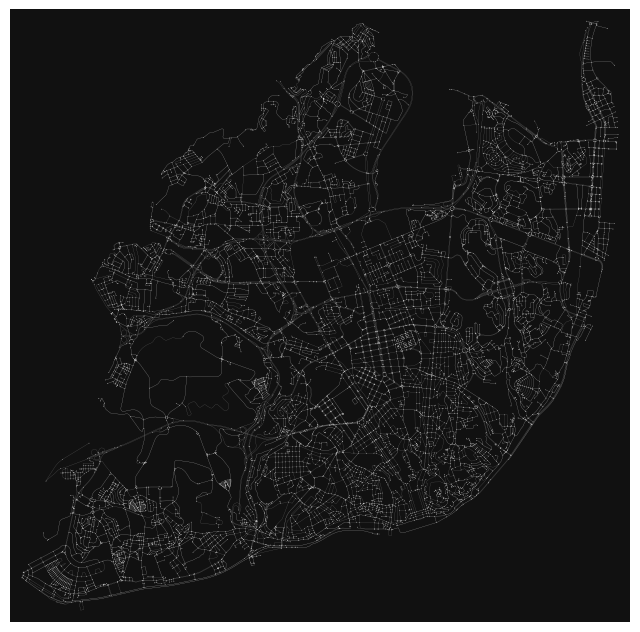

In [4]:
fig, ax = ox.plot_graph(G, node_size=0.2, edge_linewidth=0.1)

In [11]:
ox.save_graphml(G, "./data/lisboa.graphml")

In [5]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,street_count,highway,ref,geometry
0,21270959,38.757318,-9.165944,3,NaN,NaN,POINT (-9.16594 38.75732)
1,21270962,38.758035,-9.161733,3,NaN,NaN,POINT (-9.16173 38.75804)
2,21270969,38.763211,-9.136542,3,NaN,NaN,POINT (-9.13654 38.76321)
3,21272087,38.747959,-9.188383,3,NaN,NaN,POINT (-9.18838 38.74796)
4,21272088,38.747807,-9.188400,3,NaN,NaN,POINT (-9.18840 38.74781)
...,...,...,...,...,...,...,...
10089,11219092640,38.720813,-9.126435,1,NaN,NaN,POINT (-9.12644 38.72081)
10090,11232457879,38.783785,-9.128270,3,NaN,NaN,POINT (-9.12827 38.78379)
10091,11246123781,38.739131,-9.146786,3,NaN,NaN,POINT (-9.14679 38.73913)
10092,11246123782,38.739251,-9.146824,3,NaN,NaN,POINT (-9.14682 38.73925)


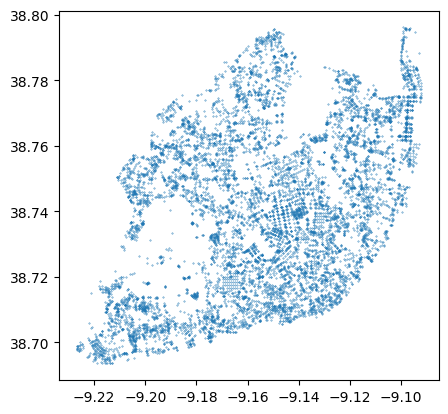

In [6]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,oneway,lanes,name,highway,maxspeed,reversed,length,geometry,junction,bridge,ref,width,tunnel,access,area
0,21270959,413210796,0,22278074,True,3,Avenida General Norton de Matos/2ª Circular,trunk,80,False,44.832,"LINESTRING (-9.16594 38.75732, -9.16646 38.75730)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21270962,21270959,0,"[22278074, 396719604]",True,"[3, 4]",Avenida General Norton de Matos/2ª Circular,trunk,80,False,375.295,"LINESTRING (-9.16173 38.75804, -9.16283 38.757...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21270969,412246923,0,"[22278381, 410895670]",True,4,Avenida Marechal Craveiro Lopes/2ª Circular,trunk,80,False,738.096,"LINESTRING (-9.13654 38.76321, -9.13724 38.763...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21272087,2688293048,0,396882454,False,NaN,Rua Professor Reinaldo dos Santos,residential,NaN,False,82.536,"LINESTRING (-9.18838 38.74796, -9.18836 38.748...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21272087,21272088,0,396882454,False,NaN,Rua Professor Reinaldo dos Santos,residential,NaN,True,16.908,"LINESTRING (-9.18838 38.74796, -9.18840 38.747...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20627,11232457879,1598539790,0,240215619,False,NaN,Rua Salgueiro Maia,residential,NaN,True,126.471,"LINESTRING (-9.12827 38.78379, -9.12861 38.783...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
20628,11246123781,207615390,0,391590536,True,1,Avenida Elias Garcia,residential,30,False,33.678,"LINESTRING (-9.14679 38.73913, -9.14653 38.739...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
20629,11246123782,1127780350,0,391261417,True,1,Avenida Elias Garcia,residential,30,False,117.174,"LINESTRING (-9.14682 38.73925, -9.14804 38.739...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
20630,11246123782,11246123781,0,1213880672,True,NaN,Avenida Elias Garcia,residential,NaN,False,19.288,"LINESTRING (-9.14682 38.73925, -9.14687 38.739...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


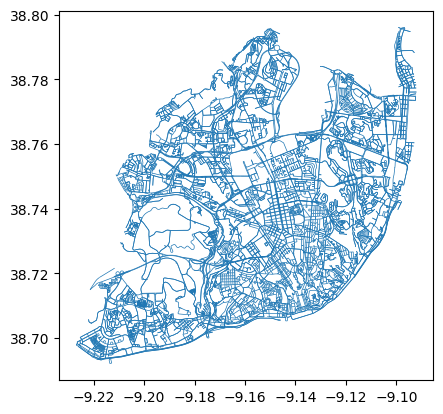

In [7]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

### Search for good osmid pairs

In [8]:
# Cais do Sodre
gdf_nodes[gdf_nodes["osmid"] == 3249306888]

,osmid,y,x,street_count,highway,ref,geometry
7808,3249306888,38.782252,-9.098395,3,NaN,NaN,POINT (-9.09839 38.78225)


In [9]:
# Gulbekain museum
gdf_nodes[gdf_nodes["osmid"] == 5548273231]

,osmid,y,x,street_count,highway,ref,geometry


In [10]:
# two random osmid
start_and_finish = gdf_nodes.sample(2)

osmid_1 = start_and_finish.iloc[0]["osmid"]
osmid_2 = start_and_finish.iloc[1]["osmid"]

coords_1 = start_and_finish.iloc[0]["y"], start_and_finish.iloc[0]["x"]
coords_2 = start_and_finish.iloc[1]["y"], start_and_finish.iloc[1]["x"]

print(f"osmid_1: {osmid_1}, osmid_2: {osmid_2}, distance: {geopy.distance.distance(coords_1, coords_2).km} km")

osmid_1: 207606356, osmid_2: 989207040, distance: 3.3665091532198015 km


## Neo4j Import

In [47]:
NEO4J_URI = "bolt://localhost:7690"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "graph-routing"
NEO4J_DATABASE = "neo4j"

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD), database=NEO4J_DATABASE)

In [48]:
# First, define Cypher queries to create constraints and indexes

# neo4j 4.0: "CREATE CONSTRAINT IF NOT EXISTS ON (i:Intersection) ASSERT i.osmid IS UNIQUE"
constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

rel_index_query =  "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"

# neo4j 4.0: "CREATE CONSTRAINT IF NOT EXISTS ON (a:Address) ASSERT a.id IS UNIQUE"
address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE a.id IS UNIQUE"

point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

# Cypher query to import our road network nodes GeoDataFrame

node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location = 
         point({latitude: row.y, longitude: row.x }),
            i.ref = row.ref,
            i.highway = row.highway,
            i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
    '''

# Cypher query to import our road network relationships GeoDataFrame

rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
    '''

In [49]:
def create_constraints(tx):
    results = tx.run(constraint_query)
    print(results)
    
    results = tx.run(rel_index_query)
    print(results)
    
    results = tx.run(address_constraint_query)
    print(results)
    
    results = tx.run(point_index_query)
    print(results)

In [50]:
def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0
    
    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {"rows": rows[batch * batch_size:(batch + 1) * batch_size].to_dict("records")}).data()
        print(results)
        total += results[0]["total"]
        batch += 1

In [51]:
with driver.session() as session:
    session.execute_write(create_constraints)
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=["geometry"])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 94}]


In [52]:
with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=["geometry"])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 632}]


### Simple search path query

```
MATCH (source:Intersection {osmid: }) 
MATCH (target:Intersection {osmid: })
CALL apoc.algo.dijkstra(source, target, 'ROAD_SEGMENT', 'length')
YIELD path, weight
RETURN path, weight
\\ [n in nodes(path) | [n.location.latitude, n.location.longitude]] AS route
```

```
MATCH (source:Intersection {osmid: 4179043096}) 
MATCH (target:Intersection {osmid: 3249306888})
CALL apoc.algo.aStarConfig(source, target, "", 
{weight: "length", pointPropName: "location"})
YIELD path, weight
RETURN path, weight, reduce(totalLength = 0, rel in relationships(path) | totalLength + rel.length) AS sumLengt
```

### Add addresses - TODO

In [ ]:
# We'll use apoc.load.json to import a JSON file of address data

add_addresses_query = """
CALL apoc.periodic.iterate(
  'CALL apoc.load.json("/home/pcend/Piotr/kod/lisboa-routing/data/lisboa.geojson") YIELD value',
  'MERGE (a:Address {id: value.properties.id})
SET a.location = 
  point(
      {latitude: value.geometry.coordinates[1], longitude: value.geometry.coordinates[0]}),
    a.full_address = value.properties.number + " " + value.properties.street + " " + value.properties.city + ", CA " + value.properties.postcode

SET a += value.properties',
  {batchSize:10000, parallel:true})
"""

# Next, connect each address to the road network at the nearest intersection

near_intersection_query = """
CALL apoc.periodic.iterate(
  'MATCH (p:Address) WHERE NOT EXISTS ((p)-[:NEAREST_INTERSECTION]->(:Intersection)) RETURN p',
  'CALL {
  WITH p
  MATCH (i:Intersection)
  USING INDEX i:Intersection(location)
  WHERE point.distance(i.location, p.location) < 200

  WITH i
  ORDER BY point.distance(p.location, i.location) ASC 
  LIMIT 1
  RETURN i
}
WITH p, i

MERGE (p)-[r:NEAREST_INTERSECTION]->(i)
SET r.length = point.distance(p.location, i.location)
RETURN COUNT(p)',
  {batchSize:1000, parallel:false})
"""

# Create a full text index to enable search in our web app

full_text_query = "CREATE FULLTEXT INDEX search_index IF NOT EXISTS FOR (p:PointOfInterest|Address) ON EACH [p.name, p.full_address]"

In [ ]:
def enrich_addresses(tx):
    results = tx.run(add_addresses_query)        
    results = tx.run(near_intersection_query)


In [ ]:
# with driver.session() as session:
#     session.execute_write(enrich_addresses)

In [ ]:
# with driver.session() as session:
#     results = session.execute_write(lambda tx: tx.run(full_text_query))


### Query with address

```
MATCH (a:Address)-[:NEAREST_INTERSECTION]->(source:Intersection)
WHERE a.full_address CONTAINS "410 E 5TH AVE SAN MATEO, CA"
MATCH 
  (poi:Address)-[:NEAREST_INTERSECTION]->(dest:Intersection) 
WHERE poi.full_address CONTAINS "111 5TH AVE"
CALL apoc.algo.dijkstra(source, dest, "ROAD_SEGMENT", "length") 
YIELD weight, path
RETURN *
//WITH [ x in nodes(path) | {latitude: x.location.latitude, longitude: x.location.longitude}] AS route, weight AS totalDist
//RETURN *
```


```
CALL db.index.fulltext.queryNodes("search_index", $searchString) 
YIELD node, score
RETURN coalesce(node.name, node.full_address) AS value, score, labels(node)[0] AS label, node.id AS id
ORDER BY score DESC LIMIT 25
```

```
MATCH (to {id: $dest})-[:NEAREST_INTERSECTION]->(source:Intersection) 
MATCH (from {id: $source})-[:NEAREST_INTERSECTION]->(target:Intersection)
CALL apoc.algo.dijkstra(source, target, 'ROAD_SEGMENT', 'length')
YIELD path, weight
RETURN [n in nodes(path) | [n.location.latitude, n.location.longitude]] AS route
```
